In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data = {}
country_set = ['tjk','afg','aia','arm','aus']
country_names = {
    'tjk': 'Tajikistan',
    'afg': 'Afghanistan',
    'aia': 'Anguilla',
    'arm': 'Armenia',
    'aus': 'Australia'
}

for i in country_set:
    data[i] = pd.read_csv(f'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-{i}--age--gender--year.csv')

df = pd.concat([data['tjk'],data['afg'],data['aia'],data['arm'],data['aus']],ignore_index= True)
df['country'] = df['country'].replace(country_names)
df


,country,age,gender,year,population
0,Tajikistan,0,1,1950,26911
1,Tajikistan,0,1,1951,30448
2,Tajikistan,0,1,1952,32029
3,Tajikistan,0,1,1953,33649
4,Tajikistan,0,1,1954,35351
...,...,...,...,...,...
152505,Australia,99,2,2096,31512
152506,Australia,99,2,2097,31545
152507,Australia,99,2,2098,31862
152508,Australia,99,2,2099,32377


Set up the dataset by selecting five countries and changing each country's name to its full name.

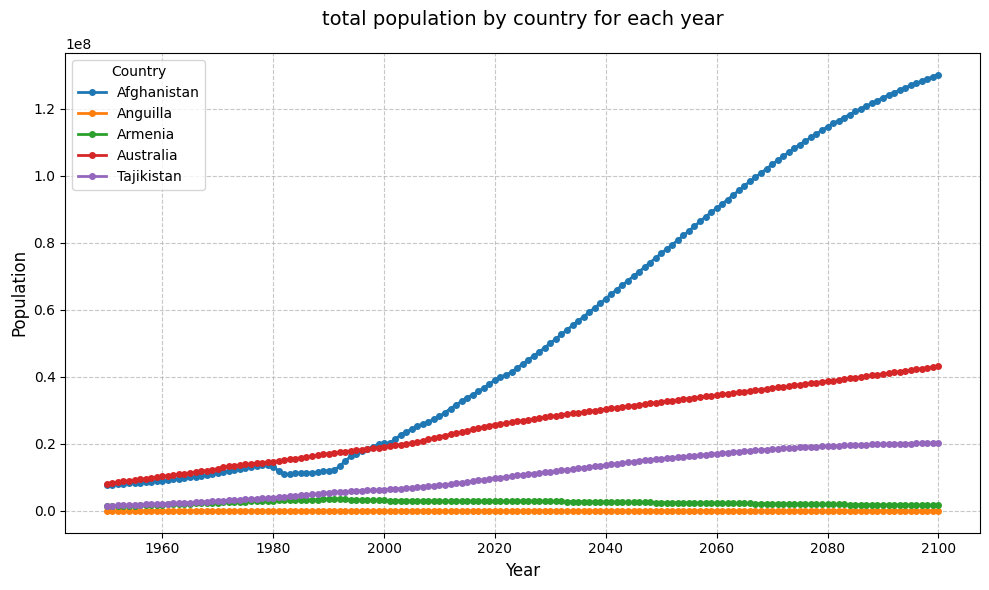

In [130]:
# Aggregate yearly population by country and year
pop_cou_data = df.groupby(['country', 'year'])['population'].sum().reset_index()
pop_cou_data = pop_cou_data.sort_values(['country', 'year'])

# Create figure and axis
plt.figure(figsize=(10, 6))

# Create line plot

for country in pop_cou_data['country'].unique():
    country_data = pop_cou_data[pop_cou_data['country'] == country]
    plt.plot(country_data['year'], country_data['population'], 
             marker='o',linestyle='-',linewidth=2, markersize=4,label=country)
# Customize the plot

plt.title('total population by country for each year', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend and display the plot
plt.legend(title="Country", fontsize=10)
plt.tight_layout()
plt.show()

Looking at this line plot, we can see that Armenia and Anguilla show no increase over time. The remaining three countries exhibit an increasing trend, with Afghanistan showing the fastest growth rate.

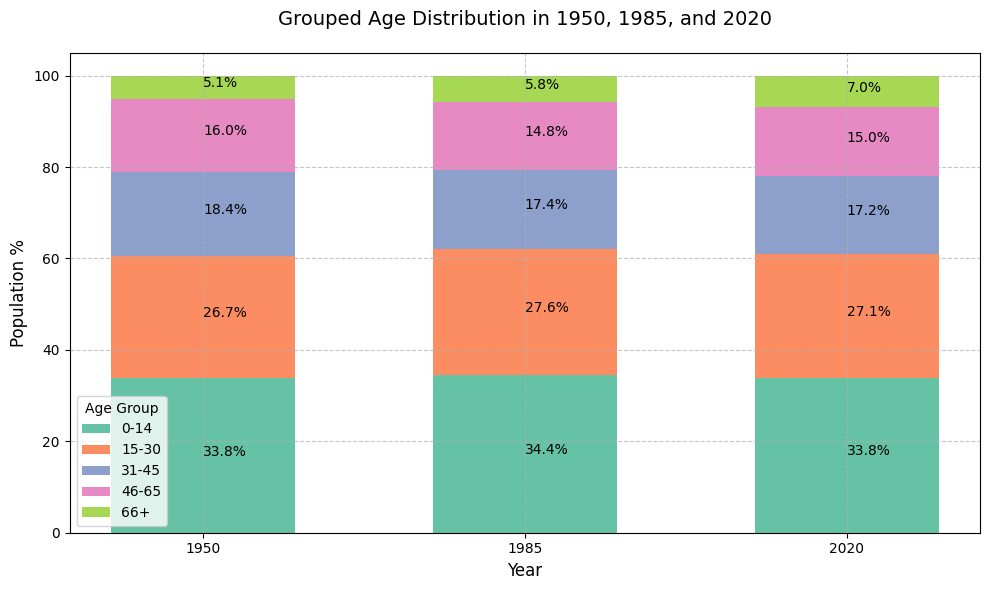

In [106]:
# Create age groups
df['age_group'] = ''
df.loc[(df['age'] >= 0) & (df['age'] <= 14), 'age_group'] = '0-14'
df.loc[(df['age'] >= 15) & (df['age'] <= 30), 'age_group'] = '15-30'
df.loc[(df['age'] >= 31) & (df['age'] <= 45), 'age_group'] = '31-45'
df.loc[(df['age'] >= 46) & (df['age'] <= 65), 'age_group'] = '46-65'
df.loc[df['age'] >= 66, 'age_group'] = '66+'

# Group years
years = [1950, 1985, 2020]
byyear_data = df[df['year'].isin(years)]

# Aggregate population data by year and age group
age_distribution = byyear_data.groupby(['year', 'age_group'])['population'].sum().unstack()

# Calculate percentage
age_pct = age_distribution.div(age_distribution.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(10, 6))
colors = plt.cm.Set2.colors 
age_groups = age_pct.columns
bottom = None
for i, age_group in enumerate(age_groups):
    plt.bar(age_pct.index, age_pct[age_group], width=20, bottom=bottom, color=colors[i], label=age_group)
# add annotation
    for year in years:
        y_position = bottom[year] + age_pct[age_group][year] / 2 if bottom is not None else age_pct[age_group][year] / 2
        plt.text(year, y_position, f'{age_pct[age_group][year]:.1f}%')
    if bottom is None:
        bottom = age_pct[age_group]
    else:
        bottom += age_pct[age_group]

# Customize the plot
plt.xticks([1950, 1985, 2020])
plt.title('Grouped Age Distribution in 1950, 1985, and 2020', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population %', fontsize=12)
plt.legend(title='Age Group', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Looking at this stacked bar plot, I can see that in 1950, 1985, and 2020, the total population across these five countries shows a similar proportional distribution.

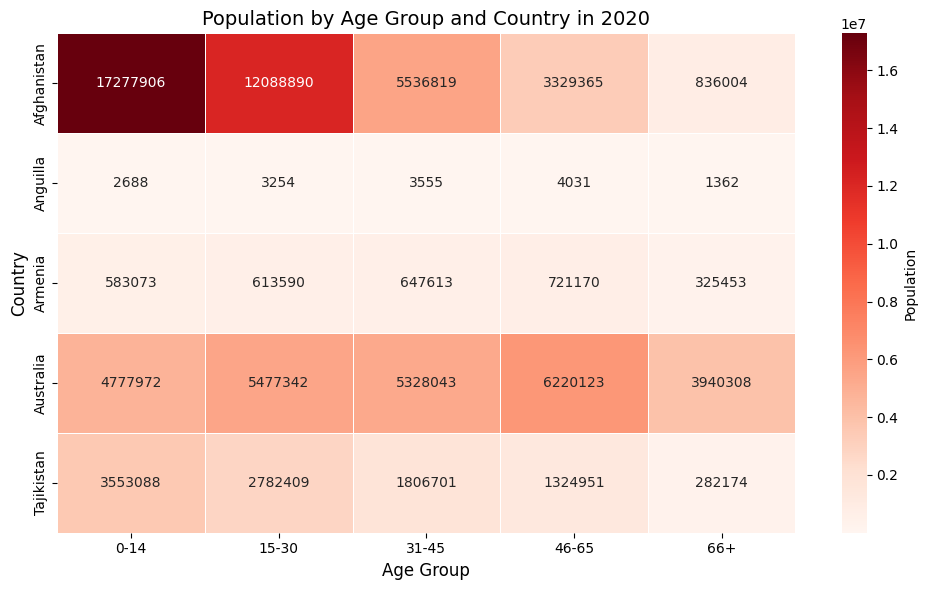

In [117]:
select2020_data = df[(df['year'] == 2020)]
population = select2020_data.groupby(['country', 'age_group'])['population'].sum().unstack()
# Create the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(population, 
                 annot=True,           
                 cmap='Reds',         
                 fmt='.0f',            
                 linewidths=0.5,      
                 cbar_kws={'label': 'Population'}) 
# Set labels and title
ax.set_title('Population by Age Group and Country in 2020', fontsize=14)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Country', fontsize=12)

plt.tight_layout()
plt.show()

Looking at this heat map, it’s clear that Afghanistan has the largest population, especially in the 0-14 and 15-30 age groups. This also explains its rapid growth trend seen in the line plot.

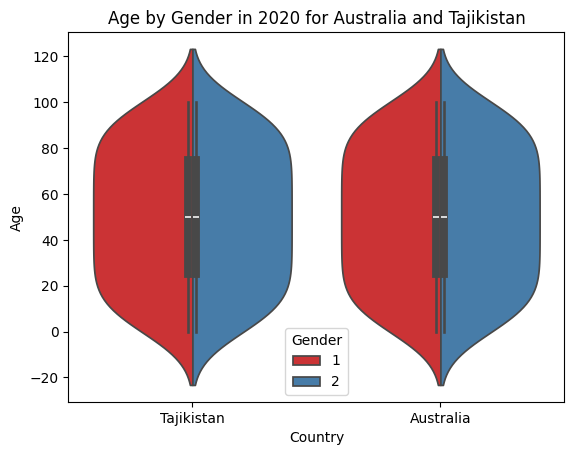

In [128]:

select_year_country = df[(df['year'] == 2020) & (df['country'].isin(['Australia', 'Tajikistan']))]
ax = sns.violinplot(data=select_year_country, x='country', y='age', hue='gender', split=True, palette='Set1')

ax.set_title('Age by Gender in 2020 for Australia and Tajikistan')
ax.set_xlabel('Country')
ax.set_ylabel('Age')
plt.legend(title='Gender')
plt.show()


Observing this plot, Australia and Tajikistan have similar age distribution shapes, indicating a comparable age structure and a similar gender distribution as well.

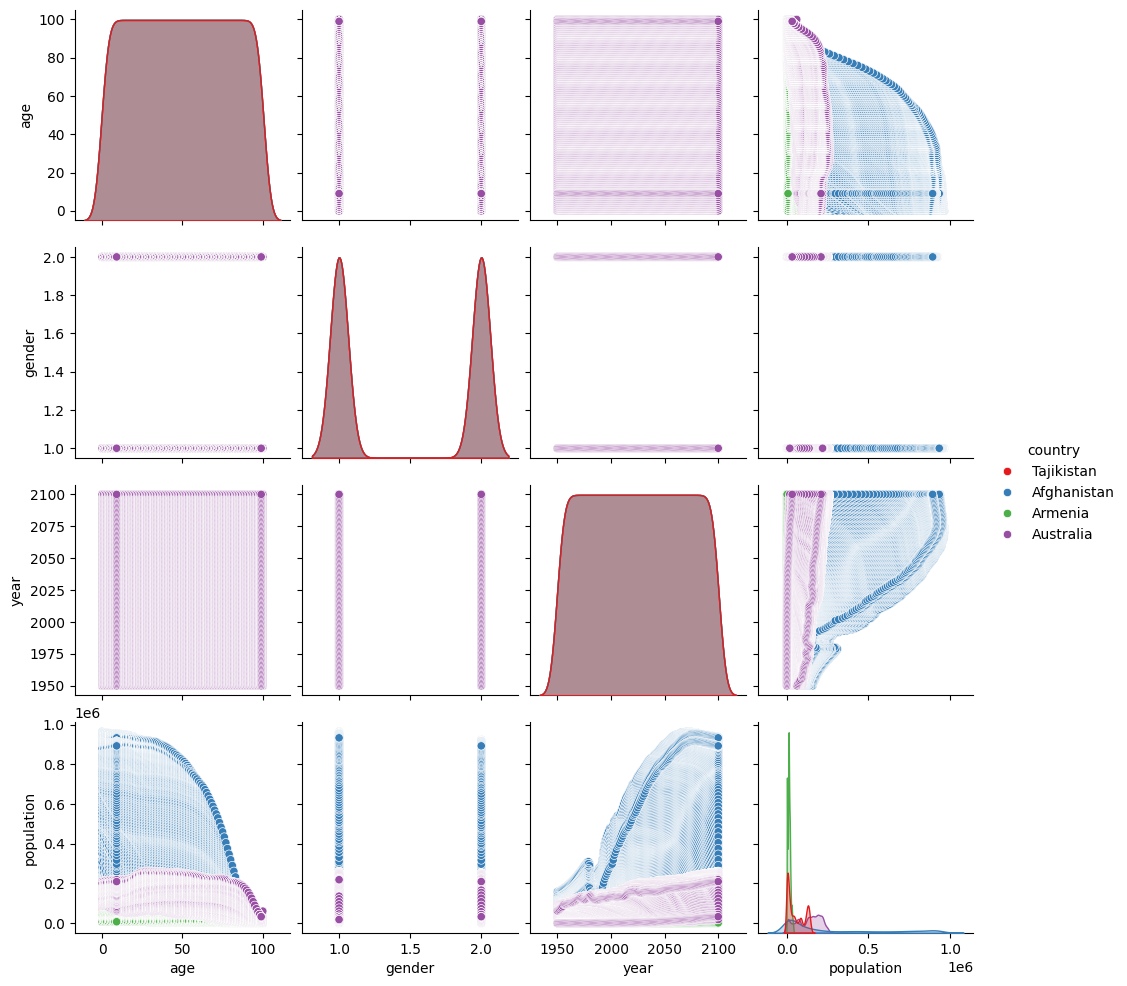

In [129]:
fourcountry_data = df[df['country'].isin(['Australia', 'Tajikistan','Afghanistan', 'Armenia'])]
sns.pairplot(fourcountry_data, 
             hue='country', 
             diag_kind='kde', 
             palette='Set1')

We can see that Afghanistan has the largest population and shows an upward trend over time. Additionally, gender distribution is balanced across all countries.

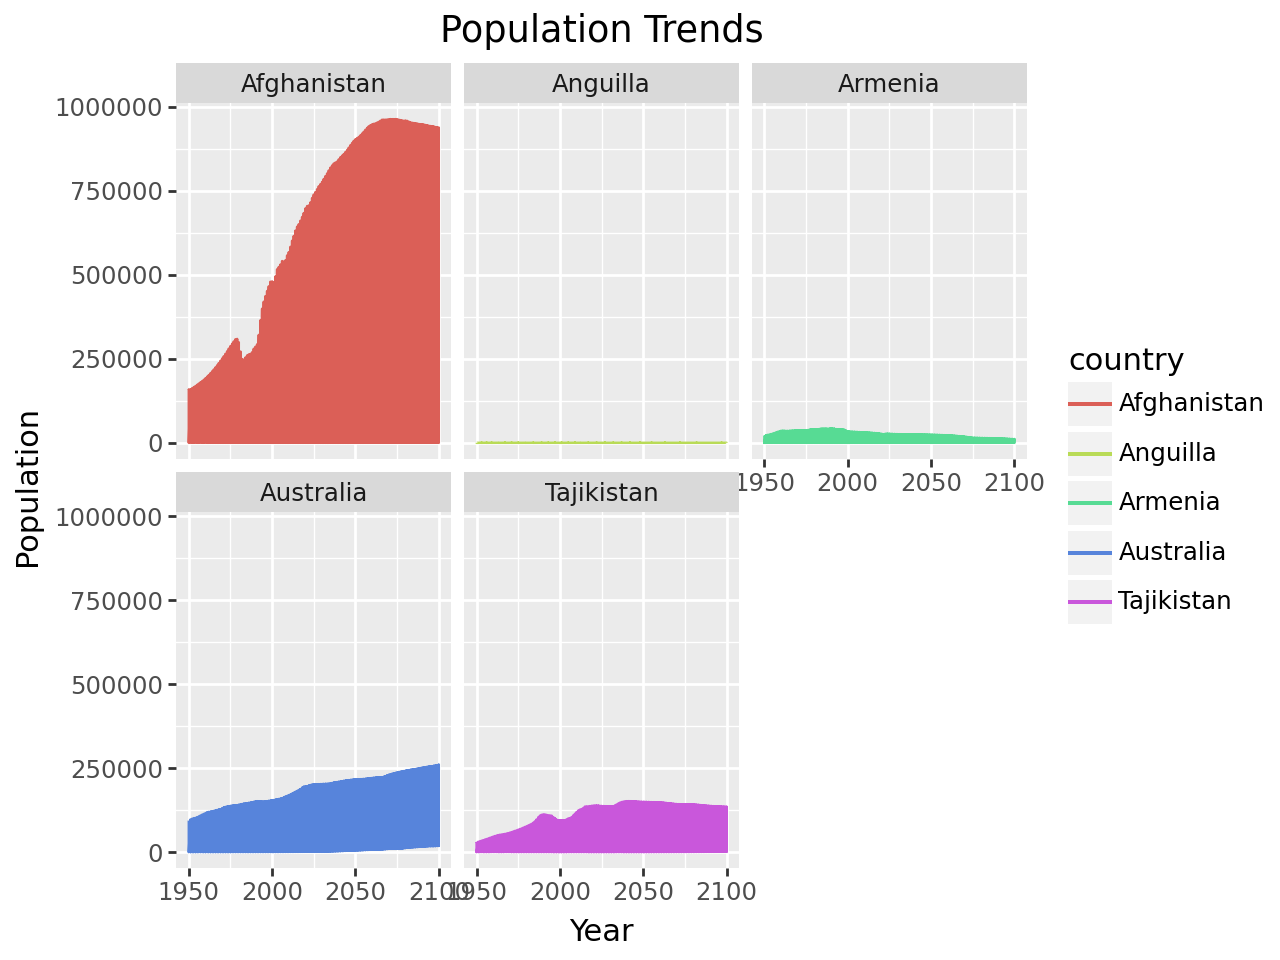

In [142]:
from plotnine import *
(
    ggplot(df, aes(x='year', y='population', color='country')) +
    geom_line() +facet_wrap('~country') +labs(title="Population Trends",
    x="Year", y="Population")
)